# Introduction

The dataset contains 4 csv files and one folder with several subfolders, each with a different number of images.

In this Exploratory Data Analysis Notebook we will look to the data, will analyze the content of each csv file, check for missing data, understand the data distribution, see what are the relations between data in various files.

We will also explore the image data, understand how images are indexed in the csv files, if there are articles in the dataset without images. We will also explore image additional information, like image width and height.

We also investigate a very simple baseline model and create an initial submission.



<img src="https://images.unsplash.com/photo-1578983662508-41895226ebfb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1211&q=80" width=600></img>


# Analysis preparation

We will include here the required packages for reading, parsing, filtering, processing, visualizing the data, both tabular and image.

<img src="https://images.unsplash.com/photo-1607160199580-1b0c9b736b66?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" width=600></img>


In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image

# Read and glimpse the data

<img src="https://images.unsplash.com/photo-1532453288672-3a27e9be9efd?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=764&q=80" width=400></img>

## 表示調整

In [2]:
#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 500)

## ルートディレクトリの設定

In [3]:
data_root_dir = '../data/h-and-m-personalized-fashion-recommendations/'

In [4]:
data_root_dir

'../data/h-and-m-personalized-fashion-recommendations/'

In [5]:
print(f"files and folders: {os.listdir(data_root_dir)}")
print("Subfolders in images folder: ", len(list(os.listdir(f'{data_root_dir}/images'))))

files and folders: ['articles.csv', 'customers.csv', 'images', 'sample_submission.csv', 'transactions_train.csv']
Subfolders in images folder:  86


In [6]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk(data_root_dir)): #tqdmでプログレスバーを表示できる
    #os.walkはディレクトリ内を走査できる
    #戻り値はディレクトリ名、内包ディレクトリ一覧、内包するファイル一覧
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

88it [00:03, 27.01it/s]


In [7]:
print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

Total number of folders: 87
Total number of files: 105104


,folder,files count
60,069,4187
64,073,3438
53,062,3361
59,068,3313
61,070,3309


In [8]:
print("folder names: ", list(folder_info_df.folder.unique()))

folder names:  ['images', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095']


In [9]:
articles_df = pd.read_csv(f'{data_root_dir}/articles.csv')
customers_df = pd.read_csv(f'{data_root_dir}/customers.csv')
sample_submission_df = pd.read_csv(f'{data_root_dir}/sample_submission.csv')

In [10]:
transactions_train_df = pd.read_csv(f'{data_root_dir}/transactions_train.csv')

In [11]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [12]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [13]:
sample_submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [14]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [15]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [17]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [18]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


# Let's look closer to the data

<img src="https://images.unsplash.com/photo-1569484221992-2a453658fff3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1179&q=80" width=600></img>

There are 3 main tables:
- articles - contains informations about each article (like product code, name, product group code, name ...)    
- customers - contains informations about each customer (fidelity card membership, age, postal code)
- transactions (train)  

Transactions have `customer_id` and `article_id`, which are foreign keys for the customer and articles tables.
Beside this, transaction also contains `sales_channel_id`.




# Articles data

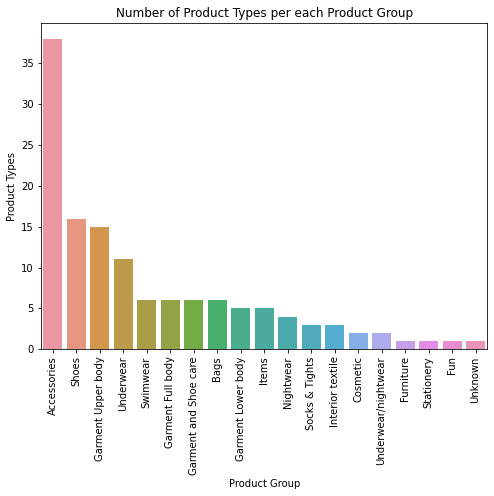

In [19]:

'''
売り物の種類の確認
groupに対して、typeがどれくらいあるかの確認
'''

temp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


In [20]:

'''
wordcloud関数の定義　
 -単語の出現頻度を可視化する
 -stopword
  -該当のワードで区切る。今回はdefaultのNoneになっている
  
結果としてtop/shirtなどが上位にランクしていることが分かる

'''

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

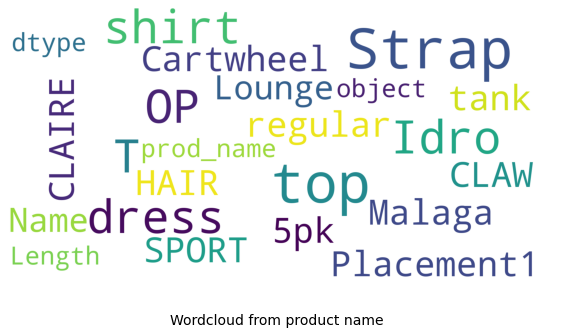

In [21]:
show_wordcloud(articles_df["prod_name"], "Wordcloud from product name")

In [22]:
articles_df.article_id.value_counts().sum()

105542

In [23]:
articles_df.article_id.nunique()

105542

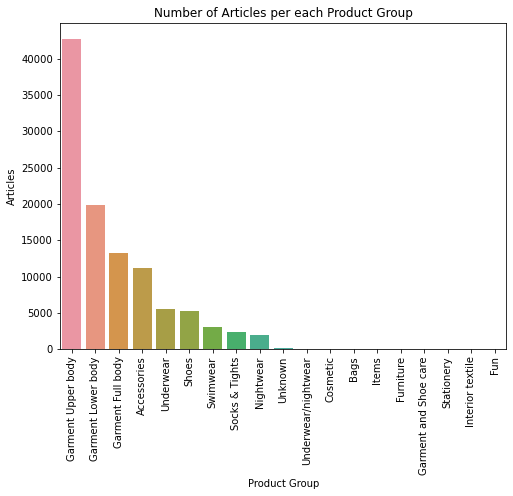

In [24]:
temp_2 = articles_df.groupby(["product_group_name"])["article_id"].nunique()

'''
売り物の種類の確認
groupに対して、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''

df = pd.DataFrame({'Product Group': temp_2.index,
                   'Articles': temp_2.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

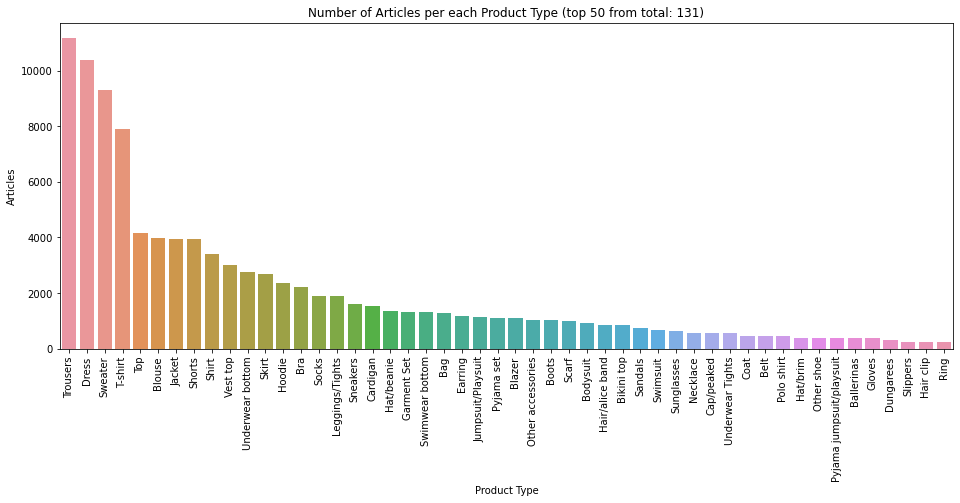

In [25]:
'''
売り物の種類の確認
prduct_typeに対して、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [26]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


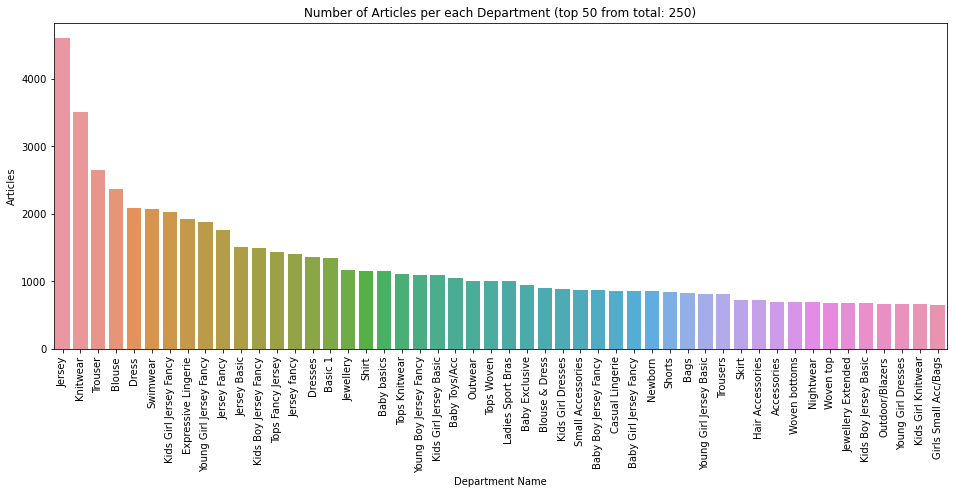

In [27]:
'''
売り物の種類の確認
department Name（担当部署）毎に、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''

temp = articles_df.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

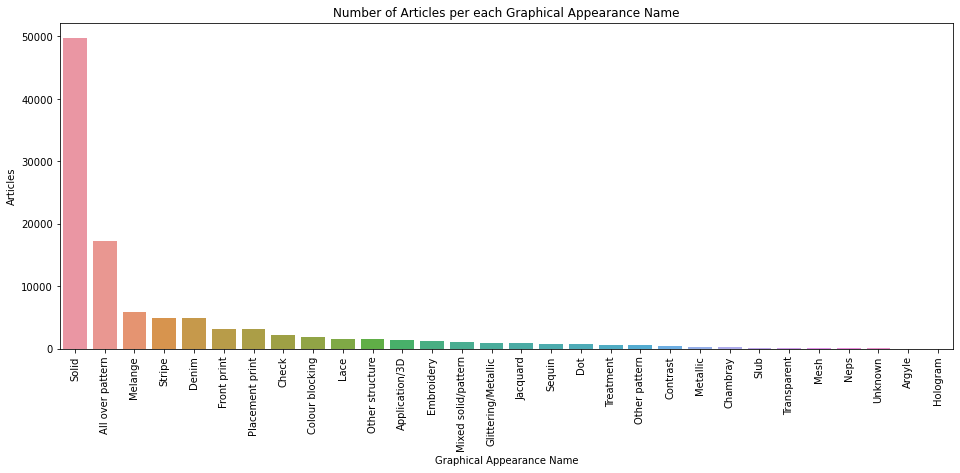

In [28]:
'''
売り物の種類の確認
graphical_appearance_name(外観とか生地感)、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''


temp = articles_df.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical Appearance Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

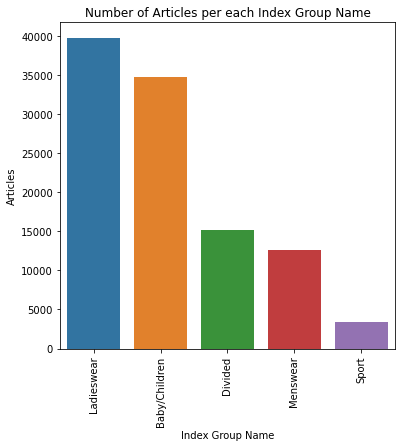

In [29]:
'''
売り物の種類の確認
index_groupname、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''



temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

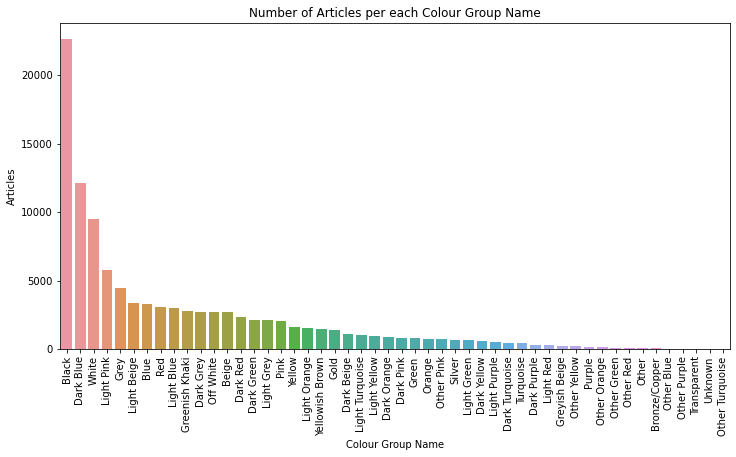

In [30]:
'''
売り物の種類の確認
color group name（色）、article_id（商品コード？）がどれくらいあるかの確認
商品コードはすべてユニークなので売れた数と同義？
'''

temp = articles_df.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

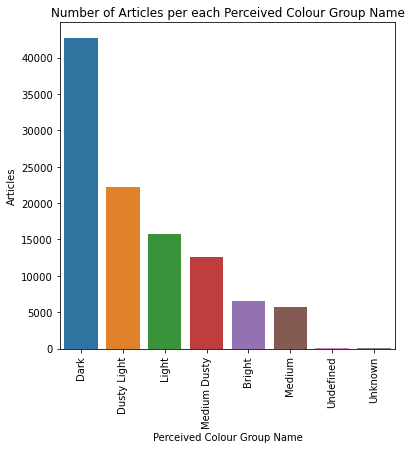

In [31]:
'''
perceived_colour_value_name：知覚色
どちらかというと明るさや暗さに対してのカラム

'''

temp = articles_df.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'Perceived Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Perceived Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

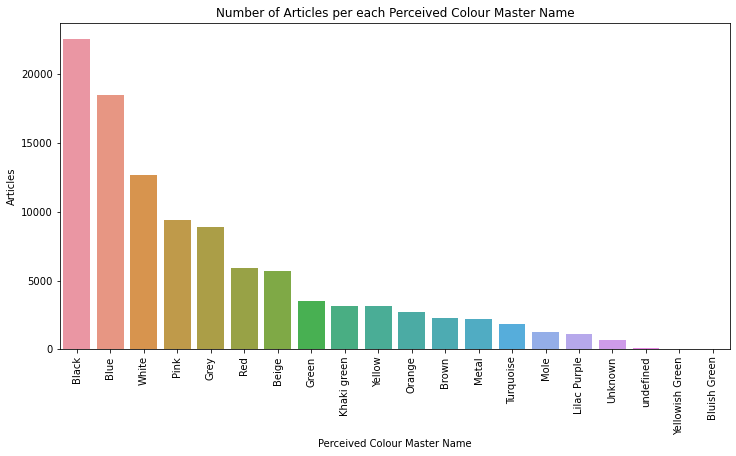

In [32]:
'''
perceived_colour_master_name：知覚色の上位概念
色を大別しているものと思われる

'''

temp = articles_df.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'Perceived Colour Master Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived Colour Master Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Master Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

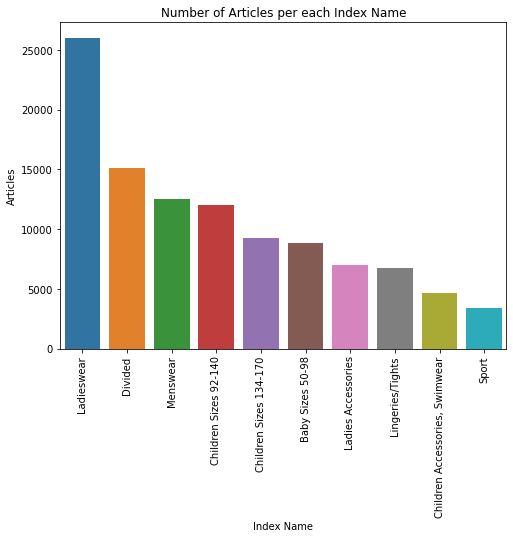

In [33]:
temp = articles_df.groupby(["index_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title(f'Number of Articles per each Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

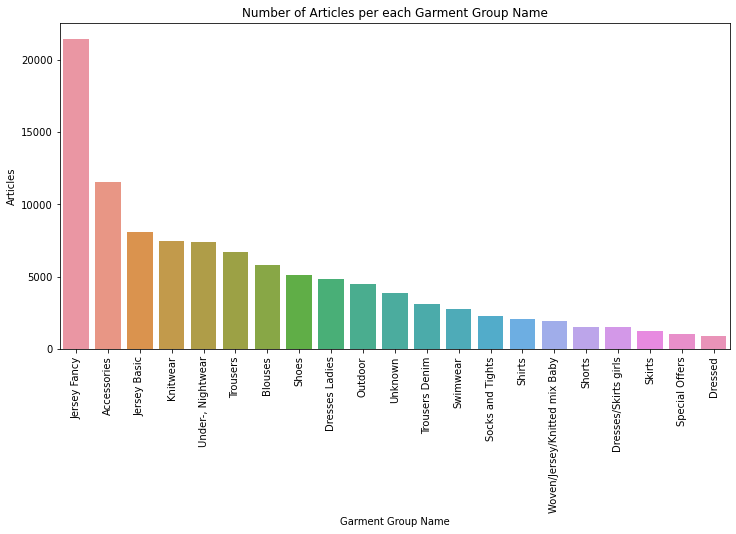

In [34]:
temp = articles_df.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Garment Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Garment Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

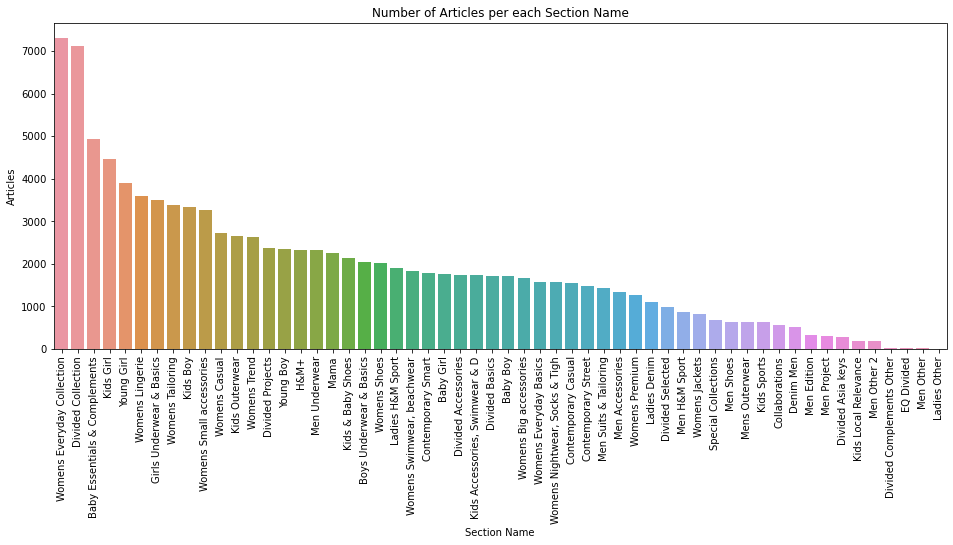

In [35]:
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

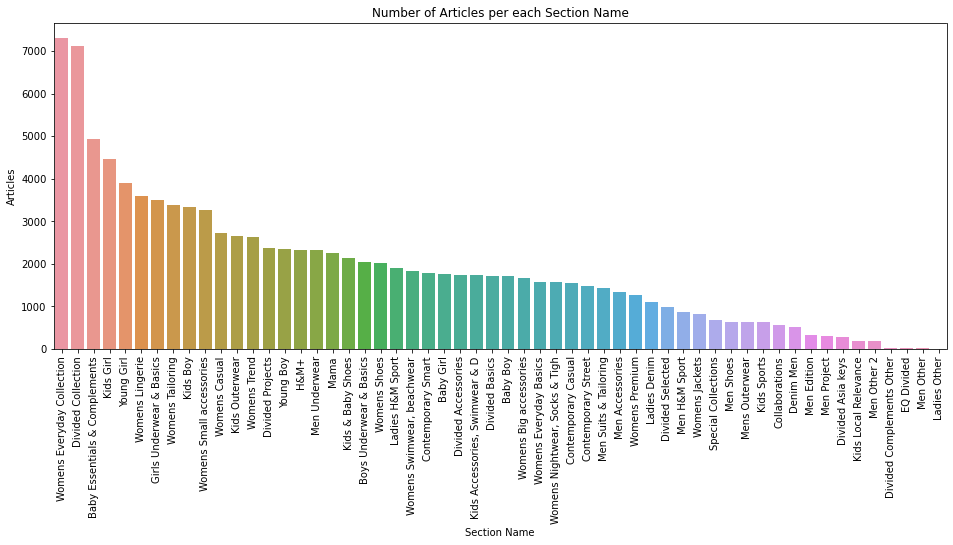

In [36]:
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

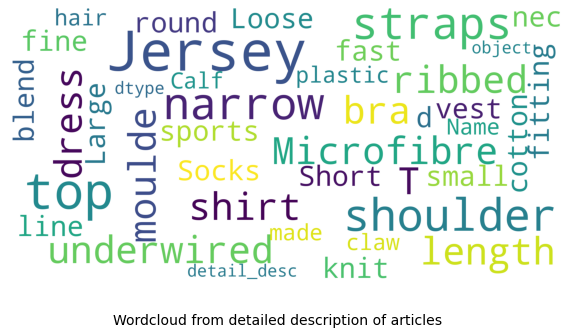

In [37]:
show_wordcloud(articles_df["detail_desc"], "Wordcloud from detailed description of articles")

# Customers data

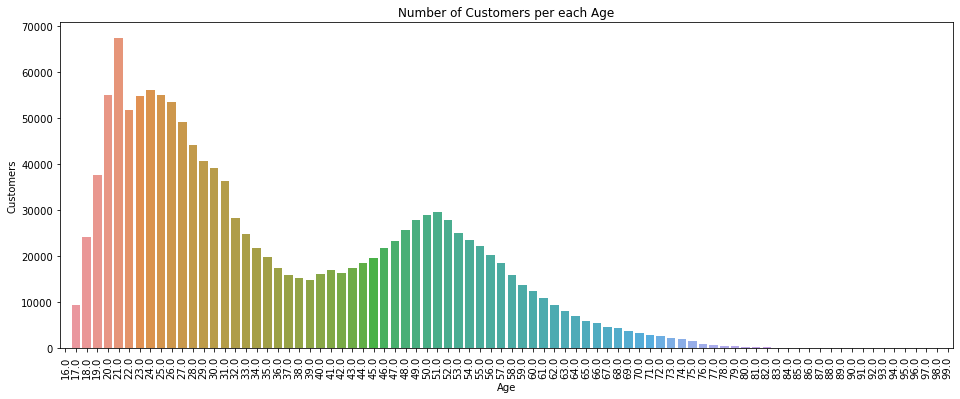

In [38]:
'''
年齢ごとのcustomer_idの数を可視化する
20代が多いことがわかる。
'''

temp = customers_df.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

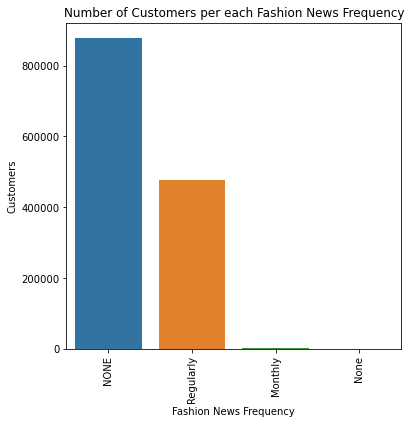

In [39]:
'''
Fashionニュースをどれくらいの周期で見ているか
NONE,Noneが多い（統合したほうがいい？）
観てない人は多いがregulary（定期的)に見ている人もいる
'''
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

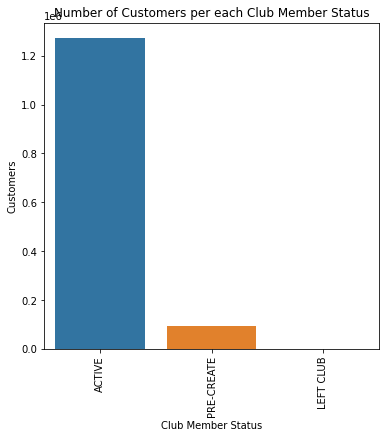

In [40]:
'''
クラブメンバーのステータスについてActive状態の人が圧倒的に多い
余り意味のあるデータではないかも
'''
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# Transactions data

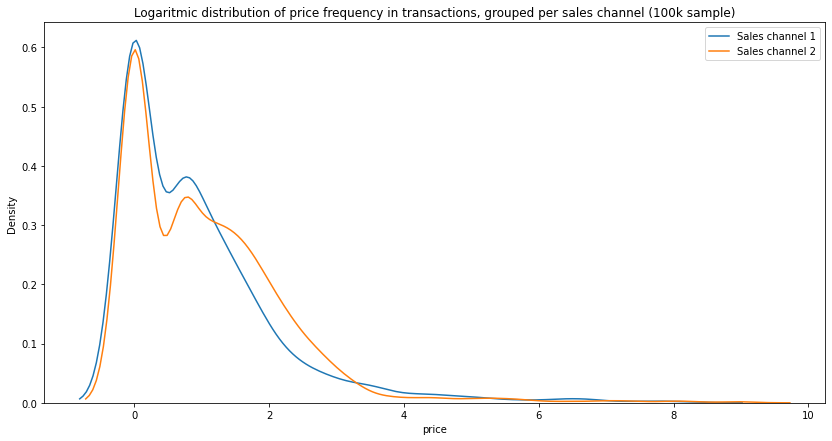

In [42]:
'''
全部で(317_883_24行と多い為、100_000行をランダムサンプリング、seed値は固定しておく
kdeplotは密度関数
　-値段毎にどれくらいの個数のデータが存在しているか密度関数で表示している

'''

df = transactions_train_df.sample(100_000,random_state=0)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 2'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

In [43]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


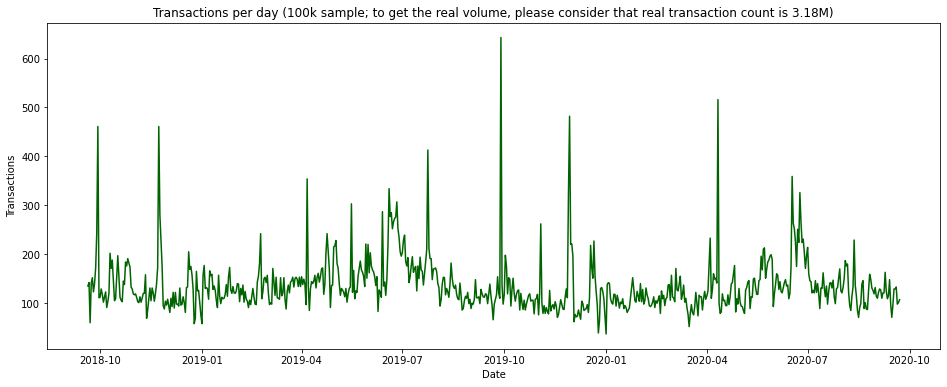

In [44]:
'''
1日当たりの購入数を表示している
t_datは日付
samplingしているので本当はこれの3.18M倍しないといけない

'''

df = transactions_train_df.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) #日付の形式変更
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_train_df.shape[0]/10.e6,2)}M)")
plt.show()

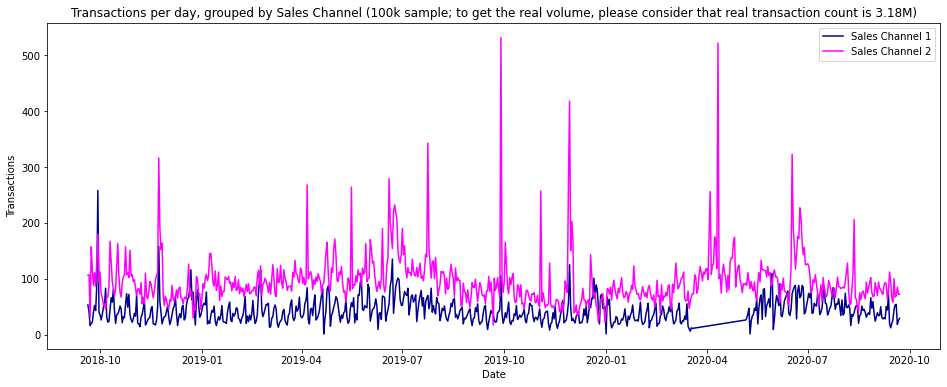

In [45]:
df = transactions_train_df.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_train_df.shape[0]/10.e6,2)}M)")
plt.show()

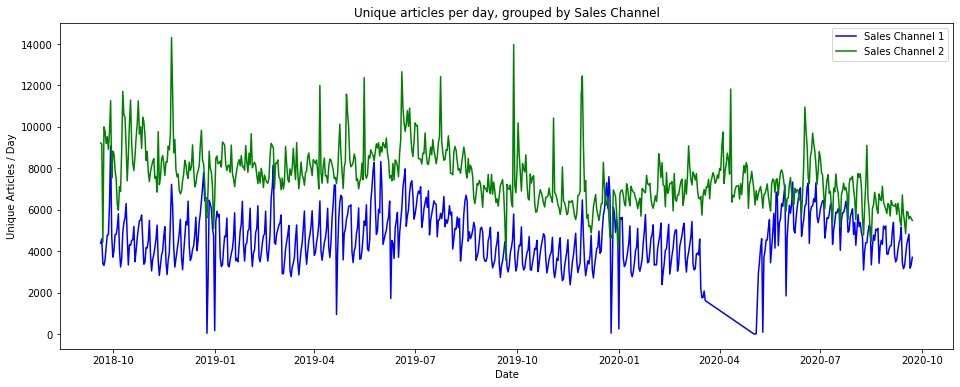

In [46]:
df = transactions_train_df.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()

# Image data

<img src="https://images.unsplash.com/photo-1575729312527-1bdecaae271e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80" width=400></img>

There are 105542 articles and 105100 different images. Let's check first which articles does not have corresponding images.

The `article_id` corresponds to digits from 2nd to the last of the image name. 
The digits from 2nd to 7th of image name  correspond to product code (`product_code`). 

In [47]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

In [48]:
image_name_df.head()

,image_name,article_id
0,0108775015,108775015
1,0108775044,108775044
2,0108775051,108775051
3,0110065001,110065001
4,0110065002,110065002


In [49]:
'''
image_nameとarticle_idのリストができたので
article_dfとマージする
'''


image_article_df = articles_df[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


Products without images

In [50]:
'''
画像を持ってない行の把握
442行あることがわかる
'''

article_no_image_df = image_article_df.loc[image_article_df.image_name.isna()]
print(article_no_image_df.shape)
article_no_image_df.head()

(442, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
88,174057028,174057,Nightwear,Pyjama jumpsuit/playsuit,NaN
117,179208001,179208,Garment Lower body,Leggings/Tights,NaN
258,212042043,212042,Shoes,Sneakers,NaN
259,212042066,212042,Shoes,Sneakers,NaN
261,212629004,212629,Garment Full body,Dress,NaN


In [51]:
print("Product codes with some missing images: ", article_no_image_df.product_code.nunique())
print("Product groups with some missing images: ", list(article_no_image_df.product_group_name.unique()))

Product codes with some missing images:  372
Product groups with some missing images:  ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']


Let's visualize few images.

In [52]:
def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
    image_path =f'{data_root_dir}/images/'
    _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
        plt.imshow(image)

Let's choose from some product group name.

In [53]:
print(image_article_df.product_group_name.unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


We will represent images grouped on product group name.

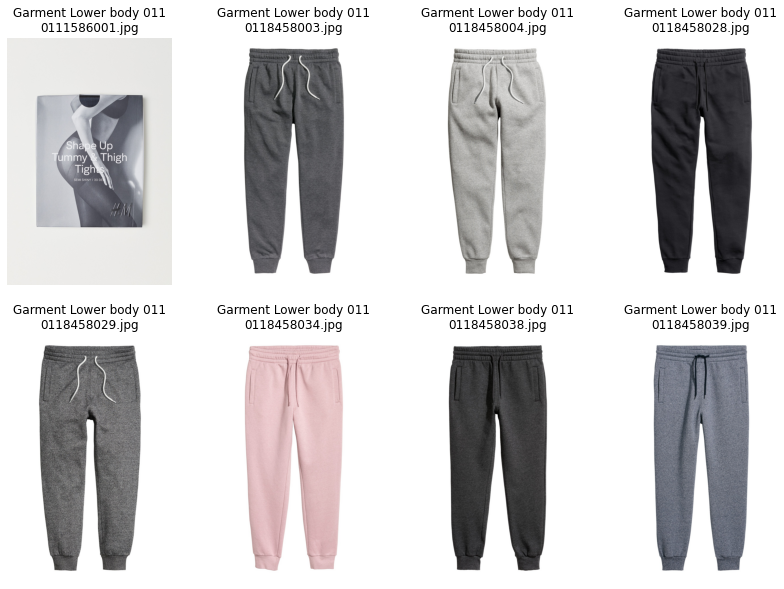

In [54]:
plot_image_samples(image_article_df, "Garment Lower body", 4, 2)

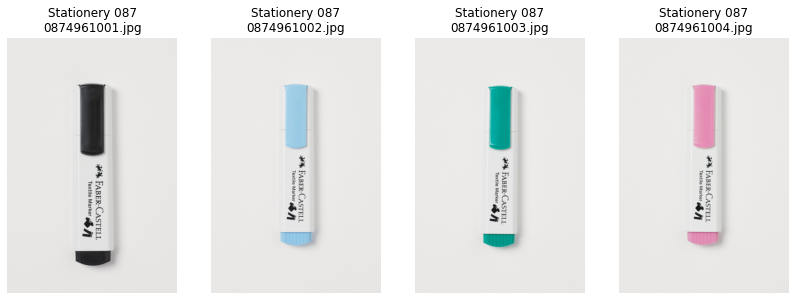

In [55]:
plot_image_samples(image_article_df, "Stationery", 4, 1)

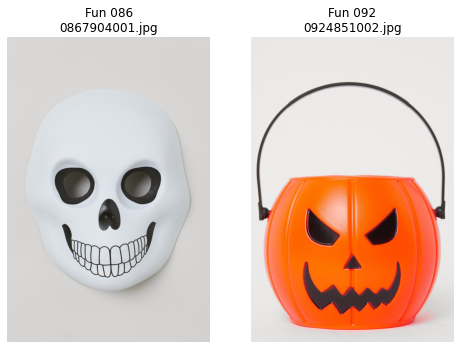

In [56]:
plot_image_samples(image_article_df, "Fun", 2, 1)

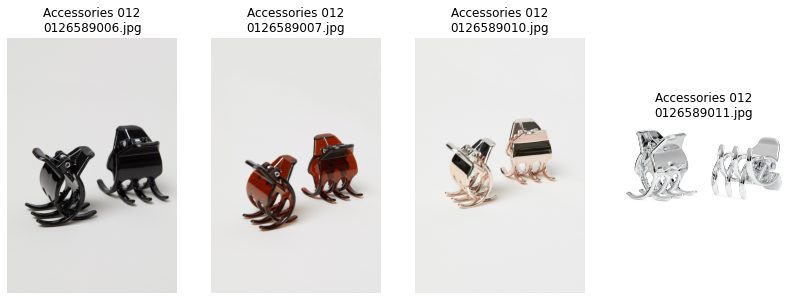

In [57]:
plot_image_samples(image_article_df, "Accessories", 4, 1)

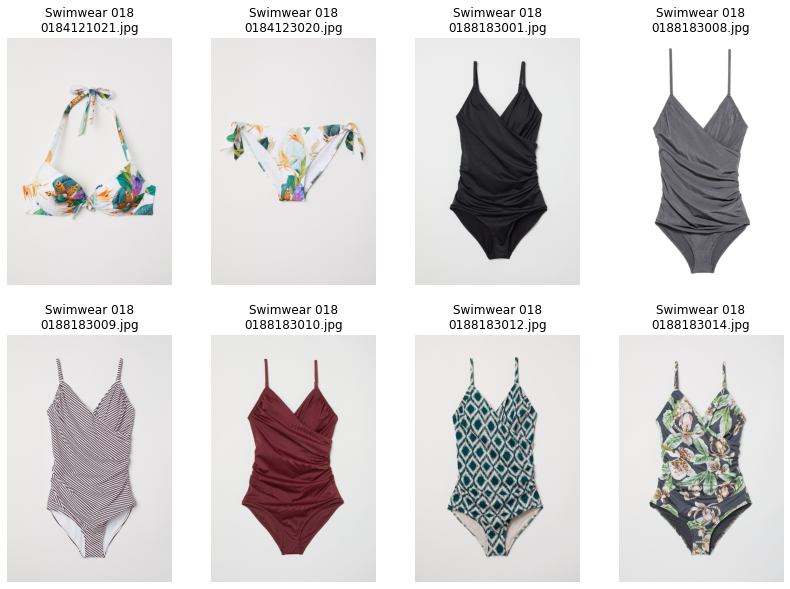

In [58]:
plot_image_samples(image_article_df, "Swimwear", 4, 2)

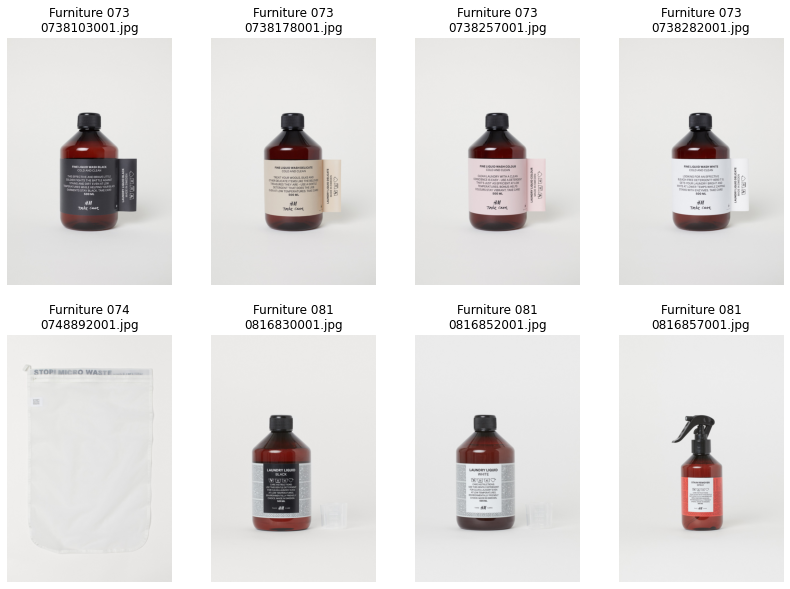

In [59]:
plot_image_samples(image_article_df, "Furniture", 4, 2)

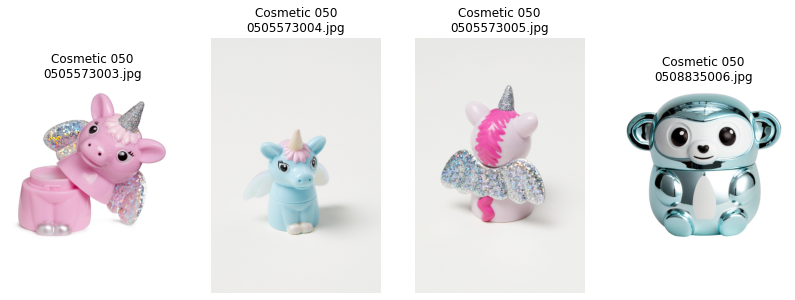

In [60]:
plot_image_samples(image_article_df, "Cosmetic", 4, 1)

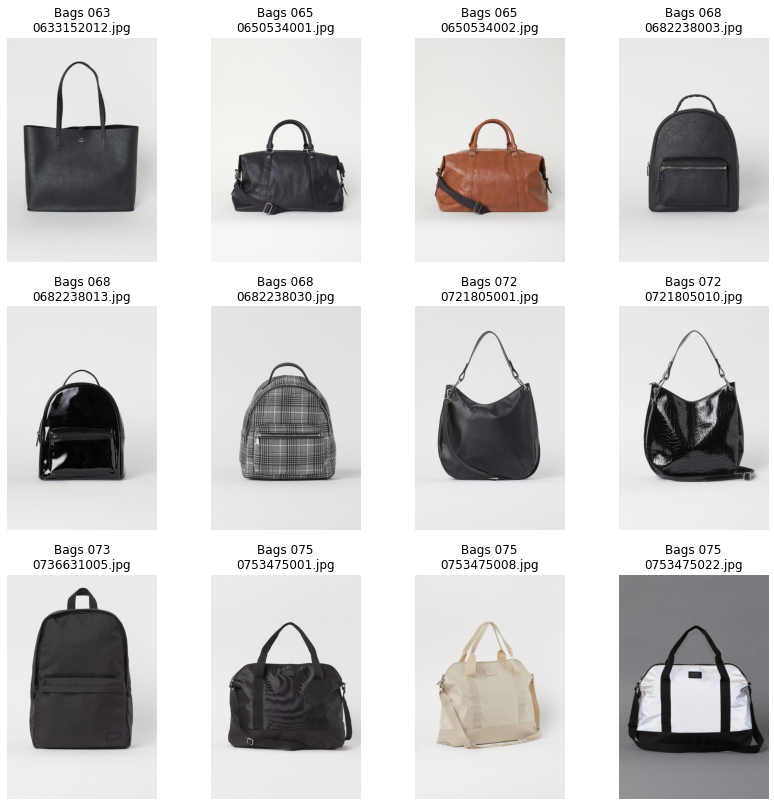

In [61]:
plot_image_samples(image_article_df, "Bags", 4, 3)

# Initial submission


<img src="https://images.unsplash.com/photo-1533120164489-96c6ca1f43eb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=764&q=80" width=400></img>

Let's prepare a very basic initial submission.

For this initial submission, we apply the following simplified logic:
- if there are articles for a certain client, pick the most recent buys;  
- if there are not articles for a certain client, just pick the most frequently buyed articles.

In [62]:
transactions_train_df = transactions_train_df.sort_values(["customer_id", "t_dat"], ascending=False)

In [63]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
19867243,2019-12-04,ffffd9ac14e89946416d80e791d064701994755c3ab686...,806050001,0.084729,2
27806865,2020-06-22,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,882810001,0.016932,1
25077914,2020-04-25,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.050831,2
24375394,2020-04-09,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,0.043203,2
24375395,2020-04-09,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,840360003,0.013542,2


Let's capture first what are the most frequent recently bought articles.

In [64]:
last_date = transactions_train_df.t_dat.max()
print(last_date)
print(transactions_train_df.loc[transactions_train_df.t_dat==last_date].shape)

2020-09-22
(32866, 5)


In [65]:
most_frequent_articles = list(transactions_train_df.loc[transactions_train_df.t_dat==last_date].article_id.value_counts()[0:12].index)
art_list = []
for art in most_frequent_articles:
    art = "0"+str(art)
    art_list.append(art)
art_str = " ".join(art_list)
print("Frequent articles bought recently: ", art_str)

Frequent articles bought recently:  0924243002 0751471001 0448509014 0918522001 0866731001 0714790020 0788575004 0915529005 0573085028 0918292001 0850917001 0928206001


In [66]:
agg_df = transactions_train_df.groupby(["customer_id"])["article_id"].agg(lambda x: str(x.values[0:12])[1:-1]).reset_index()

In [67]:
agg_df.head(3)

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043 841260003 887593002 890498002 795440...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,826211002 599580055 599580055 811835004 811835...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007 858883002 851400006 750424014 750424...


In [68]:
def padding_articles(x):
    if x:
        xl = x.split()
        x = []
        for xi in xl:
            x.append("0"+xi)
        dimm_x = len(x)
        if dimm_x < 12:
            x.extend(art_list[:12-dimm_x])
        return(" ".join(x))

In [69]:
agg_df["article_id"] = agg_df["article_id"].apply(lambda x: padding_articles(x))

In [70]:
print("Aggregated transaction history: ", agg_df.customer_id.nunique())
print("Submission sample: ", sample_submission_df.customer_id.nunique())

Aggregated transaction history:  1362281
Submission sample:  1371980


We will replace the values in sample submission with the existent in aggregated transactions data and just let the default one otherwise.

In [71]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


For the customers with missing articles, we simply replace with most frequent buyed articles in most recent day(s).

In [72]:
submission_df = agg_df.merge(sample_submission_df[["customer_id"]], how="right")
submission_df.columns = ["customer_id", "prediction"]
print(submission_df.shape)
submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601043 0841260003 0887593002 0890498002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0826211002 0599580055 0599580055 0811835004 08...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007 0858883002 0851400006 0750424014 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0742079001 0732413001 0924243002 0751471001 04...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0896152002 0730683050 0927530004 0791587015 05...


In [73]:
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  9699


We replace the missing data with the most frequently bought articles, from recent days. We calculated it before.

In [74]:
submission_df.loc[submission_df.prediction.isna(), ["prediction"]] = art_str

In [75]:
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  0


In [78]:
submission_df.to_csv("../data/output/submission.csv", index=False)

# Model prediction ref H&M personalized recommendation, EDA, wordcloud
https://www.kaggle.com/chiranjeevbit/h-m-personalized-recommendation-eda-wordcloud

In [87]:
from pathlib import Path
data_path = data_root_dir
df = pd.read_csv(
    f'{data_path}transactions_train.csv',
    dtype={'article_id' : str}
)

In [88]:
df.shape

(31788324, 5)

In [89]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [90]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [91]:
df.t_dat.unique()

array(['2018-09-20T00:00:00.000000000', '2018-09-21T00:00:00.000000000',
       '2018-09-22T00:00:00.000000000', '2018-09-23T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-09-25T00:00:00.000000000',
       '2018-09-26T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-29T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-03T00:00:00.000000000',
       '2018-10-04T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-07T00:00:00.000000000',
       '2018-10-08T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-10-10T00:00:00.000000000', '2018-10-11T00:00:00.000000000',
       '2018-10-12T00:00:00.000000000', '2018-10-13T00:00:00.000000000',
       '2018-10-14T00:00:00.000000000', '2018-10-15T00:00:00.000000000',
       '2018-10-16T00:00:00.000000000', '2018-10-17

In [93]:
df_3_week = df[df['t_dat'] >= pd.to_datetime('2020-08-31')].copy()
df_2_week = df[df['t_dat'] >= pd.to_datetime('2020-09-07')].copy()
df_1_week = df[df['t_dat'] >= pd.to_datetime('2020-09-15')].copy()

In [94]:
df.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2


In [121]:
purchase_dict_3_week = {}

for i,x in enumerate(zip(df_3_week['customer_id'],df_2_week['article_id'])):
    cust_id,art_id = x
    if cust_id not in purchase_dict_3_week:
        purchase_dict_3_week[cust_id] = {}
        
    if art_id not in purchase_dict_3_week[cust_id]:
        purchase_dict_3_week[cust_id][art_id] = 0
        
    purchase_dict_3_week[cust_id][art_id] +=1

print(len(purchase_dict_3_week))

#article_idの数が多い上位12個のリスト
dummy_list_3_week = list(df_3_week['article_id'].value_counts().index)[:12]

144600


In [122]:
purchase_dict_2_week= {}

for i,x in enumerate(zip(df_2_week['customer_id'], df_2_week['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_2_week:
        purchase_dict_2_week[cust_id] = {}
    
    if art_id not in purchase_dict_2_week[cust_id]:
        purchase_dict_2_week[cust_id][art_id] = 0
    
    purchase_dict_2_week[cust_id][art_id] += 1
    
print(len(purchase_dict_2_week))

dummy_list_2_week = list((df_2_week['article_id'].value_counts()).index)[:12]

143455


In [123]:
purchase_dict_1_week= {}

for i,x in enumerate(zip(df_1_week['customer_id'], df_1_week['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_1_week:
        purchase_dict_1_week[cust_id] = {}
    
    if art_id not in purchase_dict_1_week[cust_id]:
        purchase_dict_1_week[cust_id][art_id] = 0
    
    purchase_dict_1_week[cust_id][art_id] += 1
    
print(len(purchase_dict_1_week))

dummy_list_1_week = list((df_1_week['article_id'].value_counts()).index)[:12]

75481


In [124]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [130]:
dummy_pred = ' '.join(dummy_list)
dummy_pred

'0909370001 0924243001 0918522001 0448509014 0751471001 0865799006 0918292001 0762846027 0915529003 0923758001 0751471043 0924243002'

In [125]:
need_improvemnet_model = sample_submission_df[['customer_id']]
prediction_list = []

dummy_list = list((df_2_week['article_id'].value_counts()).index)[:12]
dummy_pred = ' '.join(dummy_list)

for i, cust_id in enumerate(sample_submission_df['customer_id'].values.reshape((-1,))):
    if cust_id in purchase_dict_1_week:
        #各cust_id毎に購入数順で並び替え、その後商品の列を抜粋してlに格納している
        l = sorted((purchase_dict_1_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_1_week[:(12-len(l))])
    elif cust_id in purchase_dict_2_week:
        l = sorted((purchase_dict_2_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_2_week[:(12-len(l))])
    elif cust_id in purchase_dict_3_week:
        l = sorted((purchase_dict_3_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_3_week[:(12-len(l))])
    else:
        s = dummy_pred
    prediction_list.append(s)

need_improvemnet_model['prediction'] = prediction_list
print(need_improvemnet_model.shape)
need_improvemnet_model.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0918522001 0751471001 0909370001 0915526001 09...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0909370001 0924243001 0918522001 0448509014 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007 0924243001 0924243002 0923758001 09...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0909370001 0924243001 0918522001 0448509014 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0909370001 0924243001 0918522001 0448509014 07...


In [139]:
submission_df.to_csv("../data/output/submission_3weektype.csv", index=False)